In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS
using Plots; gr();

  Activating environment at `~/Coding/julia/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [2]:
dd=IMAS.json2imas("/Users/meneghini/.julia/dev/FUSE/sample/CAT_eq_ods.json");
plot(dd.equilibrium.time_slice[1])
print(dd.equilibrium.time_slice[1].time)

0.006

In [11]:
using Statistics
function add_thickness(r,z,thikness)

    mr=Statistics.mean(r[1:end])
    dr=maximum(r)-minimum(r)
    mz=Statistics.mean(z[1:end])
    dz=maximum(z)-minimum(z)
    
    xr=thikness/dr
    xz=thikness/dz

    return @. (r-mr)*(1+xr)+mr,(z-mz)*(1+xz)+mz
end

rCSout=[0.7,7.3,7.3,0.7,0.7]
zCSout=[4.8,4.8,-4.8,-4.8,4.8]
rCSblanket,zCSblanket=add_thickness(rCSout,rCSout,-0.8)
rBlanket,zBlanket=add_thickness(rCSblanket,zCSblanket,-1.0)
rCryo=[0.0,10,10,0.0,0.0]
zCryo=[6,6,-6,-6,6];

1.97647059:0.03125:5.97647059


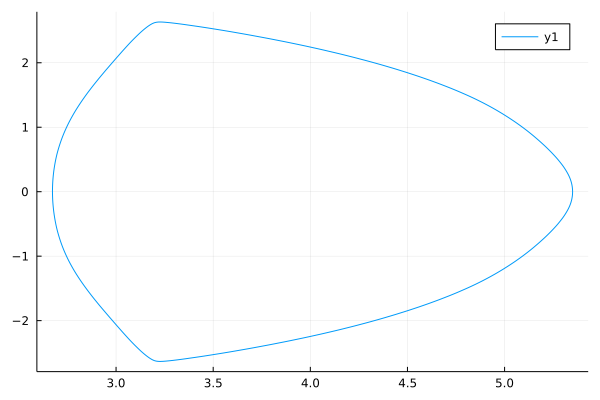

In [19]:
using Equilibrium
EQfixed=FUSE.IMAS2Equilibrium(dd.equilibrium,0.006)
ψ0, ψb = Equilibrium.psi_limits(EQfixed)
Sp = flux_surface(EQfixed, 0.999*(ψb-ψ0) + ψ0)
plot(Sp.r,Sp.z)
#contour(dd.equilibrium.time_slice[1].profiles_2d[1].psi)
#contour(EQ.psi_rz(EQ.r,EQ.z),color=:black,ls=:dash,levels=[ψb])

In [20]:
#pfoptactor=PFcoilsOptActor(dd.equilibrium,0.006, 6, zip(rCSout,zCSout), zip(rCryo,zCryo));
pfoptactor=PFcoilsOptActor(dd.equilibrium,0.006, 6, 4. ,zip(rCryo,zCryo));
display(plot(pfoptactor))

step(pfoptactor,symmetric=true,λ_currents=1E8, verbose=true);
display(plot(pfoptactor));

1.97647059:0.03125:5.97647059


LoadError: type Tuple has no field R

In [6]:
display(plot(pfoptactor.trace,:cost,start_at=1))

display(plot(pfoptactor.trace,:currents))

LoadError: UndefVarError: pfoptactor not defined